In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import random
from random import randint
from numba import jit
from utility import *
from tqdm import tqdm
from sklearn.datasets import make_blobs

# K means

Implementazione dell'algoritmo K-means per il clustering.

L'algoritmo parte da un insieme di centroidi selezionato casualmente. Ad ogni iterazione, per ogni cluster, ricalcola il valore dei centroidi e sposta ogni punto nel cluster con centroide più vicino. L'algoritmo continua fino a convergenza.

Allo scopo di ridurre la dipendenza di K-means dalla scelta dei punti iniziali, seguendo l'approccio multistart, l'algoritmo è ripetuto di default 10 volte, e solo la soluzione migliore è restituita.

In [2]:
def k_means(points, K, iters = 10):
    N = points.shape[0]
    dimension = points.shape[1]     #inizializzazione dei centroidi in corrispondenza di K punti 
    centroids = np.zeros((K,dimension))
    clusters = np.zeros(N)
    best_val = -1
    
    for iter in range(iters):
        choices = np.arange(N)
        for i in range(K):
            choice = np.random.randint(len(choices))
            centroids[i] = points[choice].copy()        #centroids_list[i]
            choices = np.delete(choices, choice)
        finito = False
        while(finito == False):
            for i in range(N):
                dist = -1
                centroid = -1
                for c in range(K):
                    dist_c = np.linalg.norm(centroids[c]-points[i])
                    if(dist_c < dist or dist == -1):
                        centroid = c
                        dist = dist_c
                clusters[i] = centroid        
            old_centroids = centroids.copy()

            for i in range(K):      #calcolo nuovi centroidi
                centroids[i] = np.zeros(dimension)
                n_elem = 0
                for j in range(N):
                    if clusters[j] == i:
                        n_elem = n_elem+1
                        centroids[i] = centroids[i] + points[j]
                if(n_elem == 0):
                    centroids[i] = points[np.random.randint(len(choices))].copy()
                else:
                    centroids[i] = centroids[i] / n_elem

            if((old_centroids == centroids).all()):     #criterio di arresto
                finito = True    
                val = squared_inner_distance(clusters, points, K)
                if(best_val == -1 or best_val > val):
                    best_val = val
                    best_sol = clusters

    return best_sol

# Esempio di utilizzo del K-means

Testiamo l'euristica dell'euristica con un istanza di 1000 punti di $R^2$ e un numero di cluster pari K pari a 10.

L'insieme di punti su cui è testata l'euristica è generato tramite la funzione make_blobs che genera un insieme di punti di $R^n$ con specifici parametri regolabili.

Un vantaggio di k-means sulle altre euristiche e che non necessità di una soluzione iniziale in ingresso o del tuning di iperparametri.

1.05523E+04


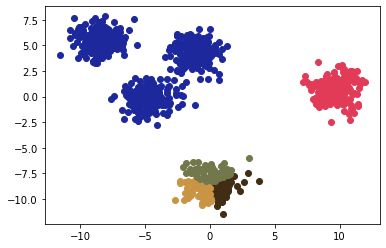

In [3]:
N = 1000
K = 5

points, centroids = make_blobs(n_samples=N, centers=K, n_features=2, random_state=np.random.randint(100))

sol = k_means(points, K, 10)

print("{:.5E}".format(squared_inner_distance(sol, points, K)))#mostra soltanto 5 cifre significative
printR2sol(points, sol, K)